In [21]:
import os, sys
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib
from scipy import stats
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import warnings

path_to_file= r"/workspaces/project-final/vietnam_housing_dataset.csv"
vietnam_housing = pd.read_csv(r"/workspaces/project-final/vietnam_housing_dataset.csv")
vietnam_housing = vietnam_housing[['Address',	'Area',	'Frontage','Access Road',  'House direction',	'Balcony direction', 	'Floors',	'Bedrooms',	'Bathrooms',	'Legal status',	'Furniture state',	'Price']]

### Xử lí outliers

In [27]:
from scipy import stats
vietnam_housing = vietnam_housing[(np.abs(stats.zscore(vietnam_housing[cols])) < 3).all(axis=1)]


In [30]:
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
print("Old Shape: ", vietnam_housing.shape)
cols = ['Area', 'Frontage', 'Access Road', 'Bedrooms', 'Bathrooms','Price']
for col in cols:
    # Tính các giá trị phân vị
    Q1 = vietnam_housing[col].quantile(0.25)
    Q3 = vietnam_housing[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Tìm chỉ số các giá trị nằm ngoài giới hạn
    upper_array = np.where(vietnam_housing[col] > upper)[0]
    lower_array = np.where(vietnam_housing[col] < lower)[0]
 # Tạo mask xác định outliers
    mask = (vietnam_housing[col] < lower) | (vietnam_housing[col] > upper)
    n_outliers = mask.sum()
    # Giữ lại những dòng hợp lệ
    vietnam_housing = vietnam_housing.loc[~mask]
print("New Shape:", vietnam_housing.shape)

Old Shape:  (0, 12)
New Shape: (0, 12)


In [31]:
for col in ['Area', 'Frontage', 'Access Road', 'Bedrooms', 'Bathrooms', 'Price']:
    Q1 = vietnam_housing[col].quantile(0.25)
    Q3 = vietnam_housing[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    mask = (vietnam_housing[col] < lower) | (vietnam_housing[col] > upper)
    print(f"{col}: {mask.sum()} outliers")


Area: 0 outliers
Frontage: 0 outliers
Access Road: 0 outliers
Bedrooms: 0 outliers
Bathrooms: 0 outliers
Price: 0 outliers


## Chia dữ liệu

In [32]:
from sklearn.model_selection import train_test_split
seed = 42
index_all = np.arange(vietnam_housing.shape[0])
index_train, index_test = train_test_split(index_all, test_size=0.33, random_state=seed)

ValueError: With n_samples=0, test_size=0.33 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
vietnam_housing_train = vietnam_housing.iloc[index_train]
vietnam_housing_test  = vietnam_housing.iloc[index_test]
print(f"train: {len(vietnam_housing_train)} / test: {len(vietnam_housing_test)} - Tỷ lệ: {len(vietnam_housing_train) / len(vietnam_housing):.3f}, {len(vietnam_housing_test) / len(vietnam_housing):.3f}")

train: 10374 / test: 5111 - Tỷ lệ: 0.670, 0.330


In [ ]:
# Lưu dữ liệu sau khi chia
import os
from pathlib import Path
# define experiment directory (change if you prefer another path)
exps_dir = Path("./exps")
(exps_dir / "data").mkdir(parents=True, exist_ok=True)
vietnam_housing_train.to_excel(f'{exps_dir}/data/train.xlsx', index=None)
vietnam_housing_test.to_excel(f'{exps_dir}/data/test.xlsx', index=None)
np.savez(f'{exps_dir}/data/idx.npz', id_train = index_train, id_test = index_test)


In [ ]:
pd.read_excel(f'{exps_dir}/data/train.xlsx')

,Address,Area,Frontage,Access_Road,House_direction,Balcony_direction,Floors,Bedrooms,Bathrooms,Legal_status,Furniture_state,Price,House_direction_sin,House_direction_cos,Balcony_direction_sin,Balcony_direction_cos
0,"Đường Phan Văn Trị, Phường 7, Gò Vấp, Hồ Chí Minh",2.068707,0.248976,0.365152,Unknown,Unknown,3,-0.360955,-0.227658,0,2,1.090140,0.0,1.0,0.0,1.0
1,"Hẻm 128, Đường Bành Văn Trân, Phường 7, Tân Bì...",-0.645782,-1.429519,0.365152,Unknown,Unknown,3,-0.360955,-0.227658,0,2,0.472554,0.0,1.0,0.0,1.0
2,"Đường Nguyễn Khang, Phường Yên Hòa, Cầu Giấy, ...",-0.645782,-2.548516,0.365152,Unknown,Unknown,4,0.960102,0.980044,0,1,1.351427,0.0,1.0,0.0,1.0
3,"Phường Bình Hưng Hòa, Bình Tân, Hồ Chí Minh",0.054731,-1.149770,0.365152,Unknown,Unknown,3,-0.360955,-0.227658,0,0,-0.620098,0.0,1.0,0.0,1.0
4,"Phường 12, Tân Bình, Hồ Chí Minh",1.017937,1.647722,0.365152,Unknown,Unknown,4,-0.360955,-0.227658,0,2,1.042634,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10369,"121C, Đường Cư xá Phú Thọ Hòa, Phường 5, Quận ...",-0.251743,-1.149770,0.365152,Đông - Nam,Unknown,4,0.960102,-0.227658,0,1,1.612713,0.0,1.0,0.0,1.0
10370,"Đường Nơ Trang Long, Phường 13, Bình Thạnh, Hồ...",0.229860,0.248976,0.365152,Unknown,Unknown,4,-0.360955,-0.227658,2,2,1.280167,0.0,1.0,0.0,1.0
10371,"Đường Lê Văn Lương, Phường Tân Kiểng, Quận 7, ...",-0.908475,-1.149770,0.365152,Unknown,Unknown,3,0.960102,-0.227658,0,2,-0.525085,0.0,1.0,0.0,1.0
10372,"Phường Bình Nhâm, Thuận An, Bình Dương",1.017937,1.647722,1.736165,Tây - Bắc,Tây - Bắc,2,-0.360955,-1.435360,0,0,-1.023904,0.0,1.0,0.0,1.0


# TIỀN XỬ LÝ DỮ LIỆU

In [ ]:
# create explicit copies of the splits
vietnam_housing_train = vietnam_housing.iloc[index_train].copy()
vietnam_housing_test  = vietnam_housing.iloc[index_test].copy()
print(f"train: {len(vietnam_housing_train)} / test: {len(vietnam_housing_test)} - Tỷ lệ: {len(vietnam_housing_train) / len(vietnam_housing):.3f}, {len(vietnam_housing_test) / len(vietnam_housing):.3f}")

train: 10374 / test: 5111 - Tỷ lệ: 0.670, 0.330


In [ ]:
vietnam_housing_train.isna().any()

Address                  False
Area                     False
Frontage                 False
Access_Road              False
House_direction          False
Balcony_direction        False
Floors                   False
Bedrooms                 False
Bathrooms                False
Legal_status             False
Furniture_state          False
Price                    False
House_direction_sin      False
House_direction_cos      False
Balcony_direction_sin    False
Balcony_direction_cos    False
dtype: bool

In [ ]:
vietnam_housing_train.dropna(inplace=True)

In [ ]:
vietnam_housing_train.duplicated().any()

np.True_

In [ ]:
vietnam_housing_train.drop_duplicates(inplace=True)

In [ ]:
# Safe NA fill: tìm biến với khoảng trắng hoặc gạch dưới trước khi fillna
vietnam_housing_train = vietnam_housing_train.copy()

def colname(df, name):
    for cand in (name, name.replace(' ', '_'), name.lower().replace(' ', '_')):
        if cand in df.columns:
            return cand
    return None

for src in ['Frontage','Access Road','Floors','Bedrooms','Bathrooms','Area','Price']:
    c = colname(vietnam_housing_train, src)
    if c:
        vietnam_housing_train[c] = vietnam_housing_train[c].fillna(vietnam_housing_train[c].median())
    else:
        print(f"Warning: numeric column not found: {src}")

for src in ['House direction','Balcony direction','Legal status','Furniture state','Address']:
    c = colname(vietnam_housing_train, src)
    if c:
        vietnam_housing_train[c] = vietnam_housing_train[c].fillna('Unknown')
    else:
        print(f"Warning: categorical column not found: {src}")
# ...existing code...

In [ ]:
# Kiểm tra trùng lặp lần nữa
vietnam_housing_train.drop_duplicates(inplace=True)
vietnam_housing_train.describe()

,Area,Frontage,Access_Road,Floors,Bedrooms,Bathrooms,Legal_status,Furniture_state,Price,House_direction_sin,House_direction_cos,Balcony_direction_sin,Balcony_direction_cos
count,10367.000000,10367.000000,10367.000000,10367.000000,10367.000000,10367.000000,10367.000000,10367.000000,10367.000000,10367.000000,10367.000000,10367.000000,10367.000000
mean,0.001575,-0.007426,0.001181,3.434938,-0.009761,-0.008881,0.370310,1.329507,-0.001785,0.001158,0.928041,0.002219,0.964213
std,1.003203,1.006863,0.992706,1.188482,0.995916,0.995396,0.766822,0.741822,0.998008,0.193465,0.318313,0.137839,0.226484
min,-2.265720,-3.247889,-3.062379,1.000000,-1.682012,-1.435360,0.000000,0.000000,-2.282830,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.777129,-0.590272,0.365152,3.000000,-0.360955,-0.227658,0.000000,1.000000,-0.743615,0.000000,1.000000,0.000000,1.000000
50%,-0.207961,0.248976,0.365152,3.000000,-0.360955,-0.227658,0.000000,1.000000,-0.002512,0.000000,1.000000,0.000000,1.000000
75%,0.580116,0.248976,0.365152,4.000000,0.960102,0.980044,0.000000,2.000000,0.710087,0.000000,1.000000,0.000000,1.000000
max,3.097586,2.347095,2.421671,7.000000,2.281158,2.187746,2.000000,2.000000,2.230299,1.000000,1.000000,1.000000,1.000000


### Chuẩn hóa dữ liệu

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Sao chép dữ liệu để không làm thay đổi bản gốc
vietnam_housing_train = pd.DataFrame(vietnam_housing_train)
vietnam_housing_clean = vietnam_housing_train.copy()

def find_col(df, name):
    for cand in (name, name.replace(' ', '_'), name.replace(' ', '_').lower()):
        if cand in df.columns:
            return cand
    return None

# Hàm mã hóa hướng an toàn (tạo cột sin/cos với tên có gạch dưới)
def encode_direction(df, name):
    angle_map = {
        'Đông': 0, 'Đông Nam': 45, 'Nam': 90, 'Tây Nam': 135,
        'Tây': 180, 'Tây Bắc': 225, 'Bắc': 270, 'Đông Bắc': 315
    }
    col = find_col(df, name)
    out_base = name.replace(' ', '_')
    if col is None:
        print(f"Warning: direction column not found: {name} -> creating default {out_base}_sin/{out_base}_cos")
        df[out_base + '_sin'] = 0.0
        df[out_base + '_cos'] = 1.0
        return df
    angles = df[col].map(angle_map).fillna(0).astype(float)
    df[out_base + '_sin'] = np.sin(np.deg2rad(angles))
    df[out_base + '_cos'] = np.cos(np.deg2rad(angles))
    return df

# Mã hóa hướng nhà & ban công -
vietnam_housing_clean = encode_direction(vietnam_housing_clean, 'House direction')
vietnam_housing_clean = encode_direction(vietnam_housing_clean, 'Balcony direction')

# Mã hóa CÁC BIẾN PHÂN LOẠI KHÁC phân loại khác 
# --- Mã hóa các biến phân loại khác ---
for src in ['Legal status', 'Furniture state']:
    col = find_col(vietnam_housing_clean, src)
    out_col = src.replace(' ', '_')
    if col:
        le = LabelEncoder()
        vietnam_housing_clean[out_col] = le.fit_transform(vietnam_housing_clean[col].astype(str))
    else:
        print(f" Warning: categorical column not found: {src}")

# --- One-Hot Encoding (sử dụng cột mới có dấu gạch dưới) ---
vietnam_housing_clean = pd.get_dummies(
    vietnam_housing_clean,
    columns=['Legal_status', 'Furniture_state'],
    drop_first=True
)

In [ ]:
# Chuẩn hóa dữ liệu số
cols_to_scale = ['Area', 'Frontage', 'Access_Road', 'Bedrooms', 'Bathrooms', 'Price']
scaler = StandardScaler()

vietnam_housing_clean[cols_to_scale] = scaler.fit_transform(vietnam_housing_clean[cols_to_scale])

# Kiểm tra kết quả
print("Dữ liệu sau khi mã hóa & chuẩn hóa:")
print(vietnam_housing_clean[[
    'Address', 'Area', 'Frontage', 'Access_Road', 'House_direction',
    'Balcony_direction', 'Floors', 'Bedrooms', 'Bathrooms', 'Price',
    'House_direction_sin', 'House_direction_cos',
    'Balcony_direction_sin', 'Balcony_direction_cos',
    'Legal_status_1', 'Legal_status_2',
    'Furniture_state_1', 'Furniture_state_2'
]].head())

print("Mean sau chuẩn hóa:")
print(vietnam_housing_clean[cols_to_scale].mean().round(2))

print("Std sau chuẩn hóa:")
print(vietnam_housing_clean[cols_to_scale].std().round(2))


Dữ liệu sau khi mã hóa & chuẩn hóa:
                                                 Address      Area  Frontage  \
19251  Đường Phan Văn Trị, Phường 7, Gò Vấp, Hồ Chí Minh  2.060632  0.254667   
1993   Hẻm 128, Đường Bành Văn Trân, Phường 7, Tân Bì... -0.645322 -1.412468   
12709  Đường Nguyễn Khang, Phường Yên Hòa, Cầu Giấy, ... -0.645322 -2.523892   
8352         Phường Bình Hưng Hòa, Bình Tân, Hồ Chí Minh  0.052989 -1.134613   
10463                   Phường 12, Tân Bình, Hồ Chí Minh  1.013166  1.643946   

       Access_Road House_direction Balcony_direction  Floors  Bedrooms  \
19251     0.366663         Unknown           Unknown     3.0 -0.352652   
1993      0.366663         Unknown           Unknown     3.0 -0.352652   
12709     0.366663         Unknown           Unknown     4.0  0.973886   
8352      0.366663         Unknown           Unknown     3.0 -0.352652   
10463     0.366663         Unknown           Unknown     4.0 -0.352652   

       Bathrooms     Price  House_dire

<Axes: title={'center': 'Boxplot sau khi chuẩn hóa (StandardScaler)'}>

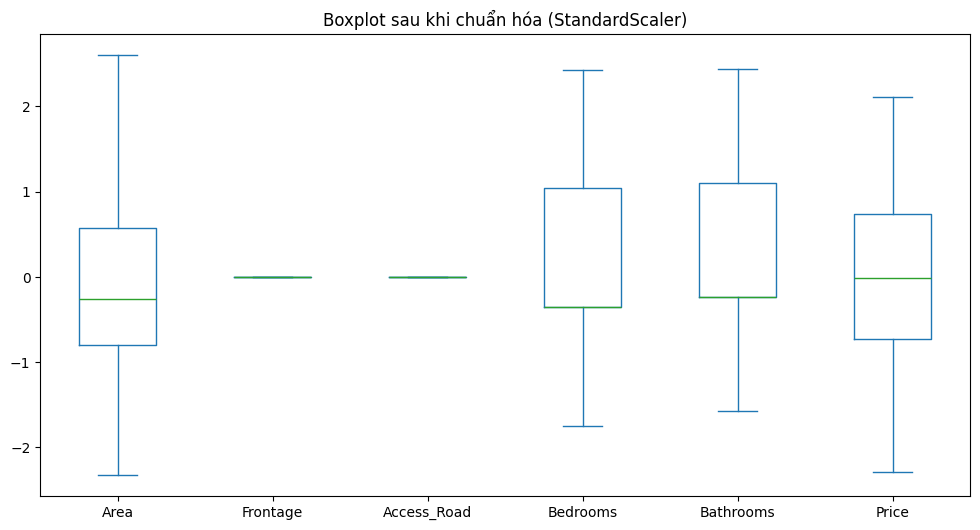

In [ ]:
# Vẽ Boxplot sau khi chuẩn hóa
vietnam_housing_clean[cols_to_scale].plot(kind="box", figsize=(12,6), title="Boxplot sau khi chuẩn hóa (StandardScaler)")

Trước / Sau: 4930 / 4930


<Axes: title={'center': 'Boxplot sau khi loại Outlier (IQR)'}>

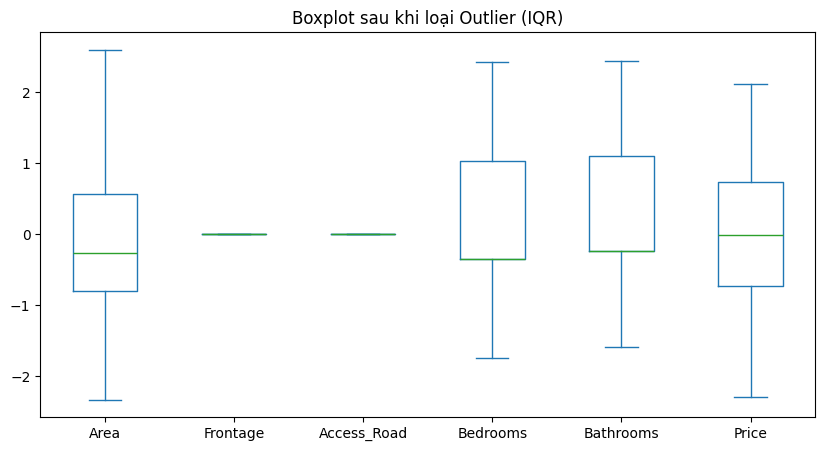

In [ ]:
cols = ['Area','Frontage','Access_Road']

mask = np.ones(len(vietnam_housing_clean), bool)
for c in cols:
    q1, q3 = vietnam_housing_clean[c].quantile([0.25, 0.75])
    iqr = q3 - q1
    mask &= (vietnam_housing_clean[c] >= q1 - 1.5*iqr) & (vietnam_housing_clean[c] <= q3 + 1.5*iqr)

vietnam_housing_clean = vietnam_housing_clean[mask].copy()
print("Trước / Sau:", len(mask), "/", len(vietnam_housing_clean))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_cols = ['Area','Frontage','Access_Road','Bedrooms','Bathrooms','Price']
vietnam_housing_clean[scale_cols] = scaler.fit_transform(vietnam_housing_clean[scale_cols])

vietnam_housing_clean[scale_cols].plot(kind='box', figsize=(10,5),
    title='Boxplot sau khi loại Outlier (IQR)')


In [ ]:
scaler.__dict__

{'with_mean': True,
 'with_std': True,
 'copy': True,
 'feature_names_in_': array(['Area', 'Frontage', 'Access_Road', 'Bedrooms', 'Bathrooms',
        'Price'], dtype=object),
 'n_features_in_': 6,
 'n_samples_seen_': np.int64(4930),
 'mean_': array([-7.92694736e-18,  0.00000000e+00,  0.00000000e+00, -6.48568420e-18,
         1.08094737e-17, -5.40473683e-18]),
 'var_': array([1., 0., 0., 1., 1., 1.]),
 'scale_': array([1., 1., 1., 1., 1., 1.])}

In [ ]:
vietnam_housing_clean[['Frontage','Access_Road']].describe()


,Frontage,Access_Road
count,4930.0,4930.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


In [ ]:
vietnam_housing_clean[['Frontage','Access_Road']].describe()


,Frontage,Access_Road
count,4930.0,4930.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


In [ ]:
# xóa các khoảng trắng thay đinh do bằng gạch dưới
vietnam_housing.columns = vietnam_housing.columns.str.replace(' ', '_')

### PHÂN CỤM DỮ LIỆU

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = vietnam_housing_clean[['Area','Access_Road','Frontage','Bedrooms','Bathrooms',
                     'Price','House_direction_sin','House_direction_cos',
                     'Balcony_direction_sin','Balcony_direction_cos',
                     'Legal_status','Furniture_state']].copy()

# Xử lý NaN cho cột số & phân loại
num_cols = ['Area','Access_Road','Frontage','Bedrooms','Bathrooms','Price',
            'House_direction_sin','House_direction_cos',
            'Balcony_direction_sin','Balcony_direction_cos']
cat_cols = ['Legal_status','Furniture_state']

X[num_cols] = SimpleImputer(strategy='median').fit_transform(X[num_cols])
X[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(X[cat_cols])

# Scale dữ liệu số
X[num_cols] = StandardScaler().fit_transform(X[num_cols])


In [ ]:
# Chạy KMeans
km_inertias, km_scores = [], []
for k in range(3, 10):
    km = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(X, km.labels_))
    print(f"k={k} | Inertia={km.inertia_:.2f} | Silhouette={km_scores[-1]:.4f}")


k=3 | Inertia=132202.42 | Silhouette=0.1417
k=4 | Inertia=118626.86 | Silhouette=0.1480
k=5 | Inertia=108752.86 | Silhouette=0.1482
k=6 | Inertia=100241.77 | Silhouette=0.1558
k=7 | Inertia=92970.35 | Silhouette=0.1679
k=8 | Inertia=87554.90 | Silhouette=0.1380
k=9 | Inertia=80785.33 | Silhouette=0.1807


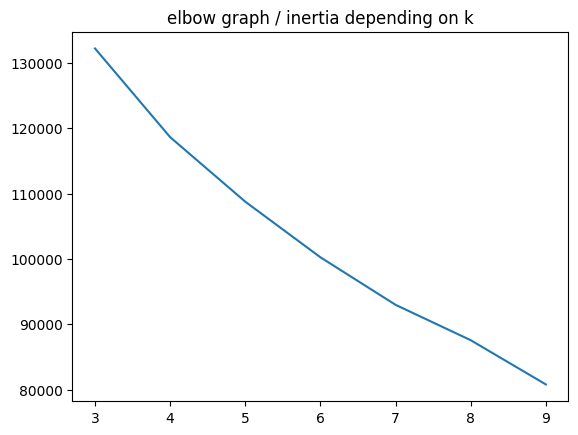

k = 3, Silhouette Score = 0.176
k = 4, Silhouette Score = 0.186
k = 5, Silhouette Score = 0.137
k = 6, Silhouette Score = 0.161
k = 7, Silhouette Score = 0.187
k = 8, Silhouette Score = 0.216
k = 9, Silhouette Score = 0.179


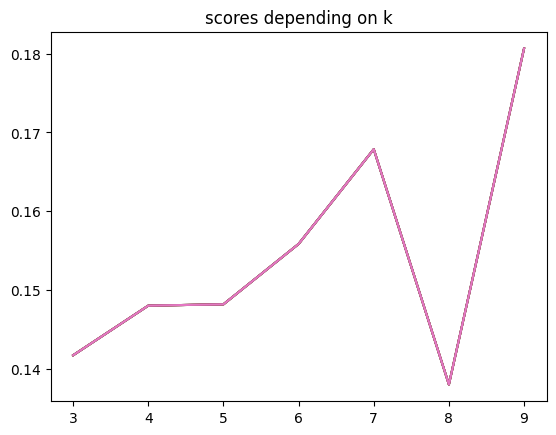

In [ ]:
# sns.lineplot(range(3, 10), km_inertias) PHUOCNT
sns.lineplot(x=range(3, 10), y=km_inertias)
plt.title('elbow graph / inertia depending on k')
plt.show()
# Bổ sung kiểm tra bằng Silhouette Score
from sklearn.metrics import silhouette_score
for k in range(3, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    score = silhouette_score(X, km.labels_)
    print(f"k = {k}, Silhouette Score = {score:.3f}")
    sns.lineplot(x=range(3, 10), y=km_scores)
plt.title('scores depending on k')
plt.show()


In [ ]:
# Gán nhãn cho các mẫu dữ liệu dựa vào mô hình K-Means với số cụm là 5 và 6
km = KMeans(n_clusters=4).fit(X)
#Assign the Cluster Labels to the Data
X['Label'] = km.labels_
clusters = km.labels_
#Info for each cluster
for k in range(4):
 print(f'Cluster nb : {k}')
 print(X[X.Label == k].describe().iloc[:, 1:-1])
 print('\n\n')
 

Cluster nb : 0
       Access_Road    Frontage    Bedrooms   Bathrooms       Price  \
count   438.000000  438.000000  438.000000  438.000000  438.000000   
mean      0.171700    0.647343   -0.721302   -0.895612   -0.411751   
std       0.854458    0.859823    0.726354    0.592920    0.843511   
min      -1.159640   -1.832909   -1.593584   -2.024929   -1.968629   
25%      -0.509065    0.149507   -1.593584   -1.120649   -1.002439   
50%      -0.021133    0.810312   -0.369034   -1.120649   -0.563261   
75%       0.629442    0.810312   -0.369034   -0.216370    0.045732   
max       3.231744    2.792727    2.080067    0.687910    2.106939   

       House_direction_sin  House_direction_cos  Balcony_direction_sin  \
count           438.000000           438.000000             438.000000   
mean              0.324632             0.297014               0.312788   
std               0.870885             0.631205               0.837080   
min              -2.242919            -2.517002           

In [ ]:
# Gán nhãn cho các mẫu dữ liệu dựa vào mô hình K-Means với số cụm là 5 và 6
km = KMeans(n_clusters=5).fit(X)
#Assign the Cluster Labels to the Data
X['Label'] = km.labels_
clusters = km.labels_
#Info for each cluster
for k in range(5):
 print(f'Cluster nb : {k}')
 print(X[X.Label == k].describe().iloc[:, 1:-1])
 print('\n\n')

Cluster nb : 0
       Access_Road    Frontage    Bedrooms   Bathrooms       Price  \
count   216.000000  216.000000  216.000000  216.000000  216.000000   
mean      0.023745    0.007250   -0.034550    0.009700   -0.043297   
std       1.074054    0.957588    1.032616    0.983847    0.974163   
min      -1.224698   -2.361553   -1.593584   -2.024929   -1.757824   
25%      -0.834352   -0.511298   -0.369034   -1.120649   -0.750644   
50%      -0.183777   -0.246976   -0.369034   -0.216370   -0.153362   
75%       0.466799    0.810312    0.855516    0.687910    0.631302   
max       3.134158    2.792727    2.080067    3.400749    2.247476   

       House_direction_sin  House_direction_cos  Balcony_direction_sin  \
count           216.000000           216.000000             216.000000   
mean              2.146810            -0.975175               2.097774   
std               0.211689             0.149400               0.295198   
min              -0.037846            -2.517002           

In [ ]:
print("KMeans n_clusters:", km.n_clusters)
print("Shape of X_scaled:", X.shape)
print("Unique cluster labels:", np.unique(X['Label']))
print("Number of duplicates:", vietnam_housing.duplicated().sum())


KMeans n_clusters: 5
Shape of X_scaled: (1981, 13)
Unique cluster labels: [0 1 2 3 4]
Number of duplicates: 0


In [ ]:
import plotly.graph_objects as go

# Chọn 2 biến để vẽ (có thể đổi sang biến khác)
x_col = 'Price'
y_col = 'Bathrooms'
# Lấy dữ liệu cho 2 biến đó
x = X[x_col].values
y = X[y_col].values
fig = go.Figure()
# Vẽ từng cụm
for i, color in zip(range(km.n_clusters), ['#DB4CB2', '#c9e9f6', '#7D3AC1']):
    fig.add_trace(go.Scatter(x=x[clusters == i], y=y[clusters == i],
                             mode='markers', name=f'Cluster {i}', marker_color=color))
# Vẽ tâm cụm
centroids = km.cluster_centers_
fig.add_trace(go.Scatter(
    x=centroids[:, X.columns.get_loc(x_col)],
    y=centroids[:, X.columns.get_loc(y_col)],
    mode='markers', name='Centroids',
    marker_color='#CAC9CD', marker_symbol='x', marker_size=12
))

fig.update_layout(title='K-Means Clustering (Area vs Price)',
                  xaxis_title=x_col, yaxis_title=y_col)
fig.show()


### DBSCAN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [ ]:
df = vietnam_housing_clean.copy()
if 'Access Road' in df.columns and 'Access_Road' not in df.columns:
    df = df.rename(columns={'Access Road':'Access_Road'})
if 'Access Road' in df.columns and 'Access_Road' not in df.columns:
    df.rename(columns={'Access Road':'Access_Road'}, inplace=True)

feat = ['Area','Access_Road','Frontage','Bedrooms','Bathrooms','Price',
        'House_direction_sin','House_direction_cos',
        'Balcony_direction_sin','Balcony_direction_cos']
feat = [c for c in feat if c in df.columns]  # chỉ giữ cột có thật
X = df[feat].copy()

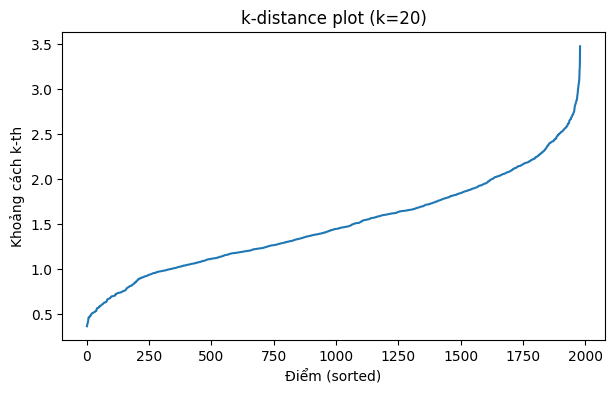

In [ ]:
k = max(5, 2*X.shape[1])  # rule of thumb
nbrs = NearestNeighbors(n_neighbors=k).fit(X)
dist, _ = nbrs.kneighbors(X)
kdist = np.sort(dist[:, -1])

plt.figure(figsize=(7,4))
plt.plot(kdist); plt.title(f'k-distance plot (k={k})')
plt.xlabel('Điểm (sorted)'); plt.ylabel('Khoảng cách k-th'); plt.show()


In [ ]:
for eps_test in [1.2, 1.5, 1.8, 2.0, 2.3]:
    db = DBSCAN(eps=eps_test, min_samples=10).fit(X)
    labels = db.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    noise = (labels == -1).mean()
    print(f"eps={eps_test}: cụm={n_clusters}, noise={noise:.2%}")


eps=1.2: cụm=12, noise=32.86%
eps=1.5: cụm=5, noise=14.69%
eps=1.8: cụm=1, noise=5.35%
eps=2.0: cụm=1, noise=2.62%
eps=2.3: cụm=1, noise=0.30%


In [ ]:
# DBSCAN với eps = 1.5
db = DBSCAN(eps=1.5, min_samples=10).fit(X)
df['db'] = db.labels_

# K-Means để so sánh
km = KMeans(n_clusters=5, random_state=42).fit(X)
df['km'] = km.labels_

# Chỉ tính Silhouette nếu DBSCAN ra >=2 cụm khác nhau (bỏ noise -1)
mask = df['db'] != -1
n_clusters_db = len(set(df['db'][mask]))

if n_clusters_db > 1:
    print("Silhouette DBSCAN:", silhouette_score(X[mask], df['db'][mask]))
else:
    print("DBSCAN chỉ có 1 cụm hợp lệ → không tính được Silhouette")

print("Silhouette KMeans:", silhouette_score(X, df['km']))


Silhouette DBSCAN: 0.07078658066441573
Silhouette KMeans: 0.17529764603220044


## Hierarchical clustering 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as pl

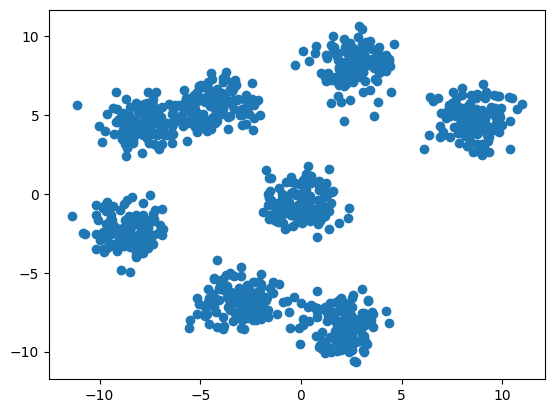

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
# Generate a random cluster dataset to experiment on. 
# X = coordinate points, y = cluster labels (not needed)
X, y = make_blobs(n_samples=1000, centers=8, n_features=2,
random_state=800)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [ ]:
# Generate distance matrix with 'linkage' function
distances = linkage(X, method="centroid", metric="euclidean")
print(distances)

[[5.72000000e+02 7.62000000e+02 7.69412624e-03 2.00000000e+00]
 [3.00000000e+01 1.96000000e+02 8.87881891e-03 2.00000000e+00]
 [5.91000000e+02 8.70000000e+02 1.07476240e-02 2.00000000e+00]
 ...
 [1.98900000e+03 1.99200000e+03 7.81168528e+00 3.75000000e+02]
 [1.99500000e+03 1.99600000e+03 1.02408477e+01 7.50000000e+02]
 [1.99400000e+03 1.99700000e+03 1.20025814e+01 1.00000000e+03]]


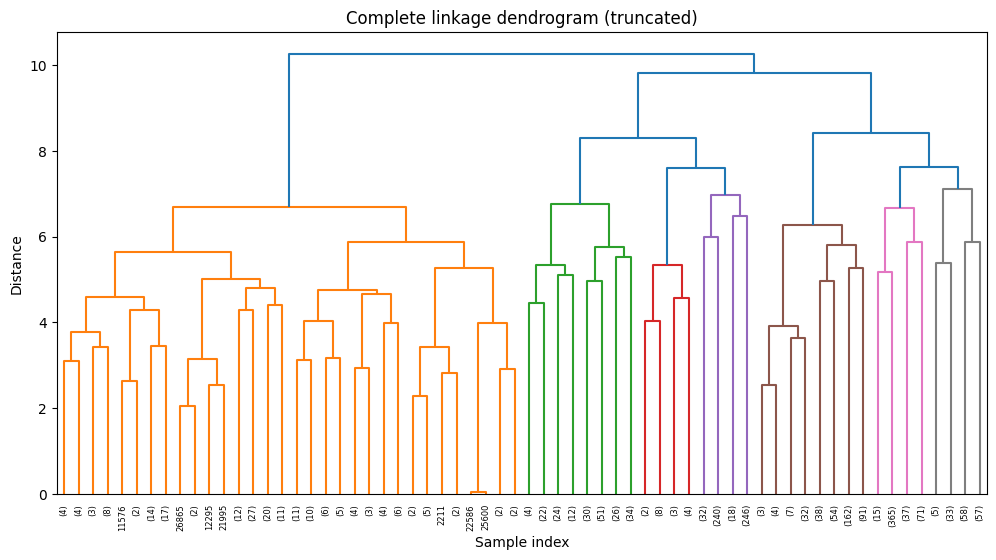

In [ ]:
# select numeric columns only (or list the feature column names you want)
numeric_cols = vietnam_housing_clean.select_dtypes(include=[np.number]).columns.tolist()
X_hier = vietnam_housing_clean[numeric_cols].dropna()

if X_hier.shape[0] < 2 or X_hier.shape[1] < 1:
    raise ValueError("Not enough numeric rows/columns for hierarchical clustering. Check vietnam_housing_clean.")

# convert to numpy array (float) for linkage
X_vals = X_hier.values.astype(float)

complete_clustering = linkage(X_vals, method="complete", metric="euclidean")
average_clustering  = linkage(X_vals, method="average",  metric="euclidean")
single_clustering   = linkage(X_vals, method="single",   metric="euclidean")

# optional: plot a truncated dendrogram for the complete linkage
plt.figure(figsize=(12, 6))
dendrogram(complete_clustering, truncate_mode='level', p=5, labels=X_hier.index)
plt.title("Complete linkage dendrogram (truncated)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

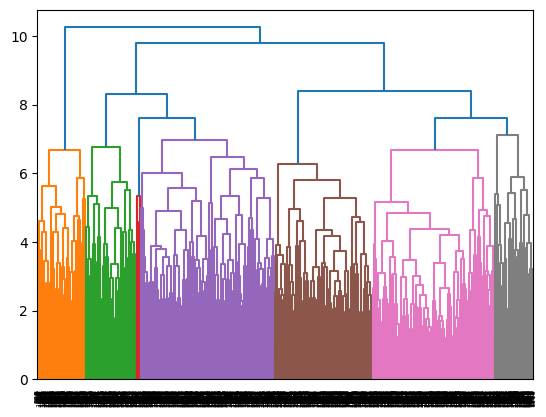

In [ ]:
dendrogram(complete_clustering)
plt.show()

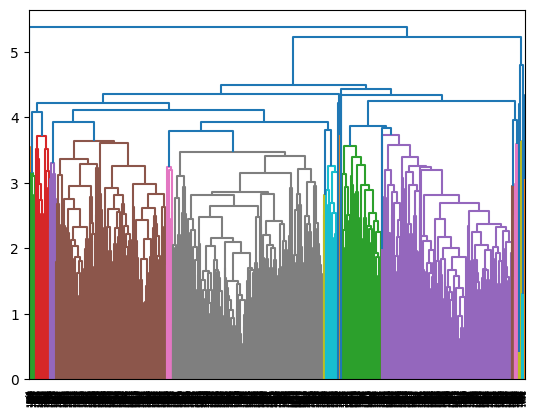

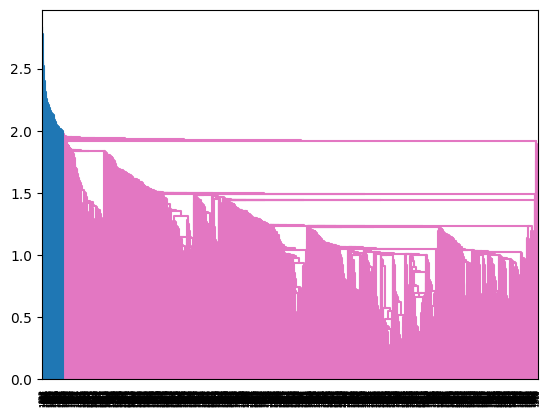

In [ ]:
dendrogram(average_clustering)
plt.show()
dendrogram(single_clustering)
plt.show()

best_k=2, silhouette=0.0078


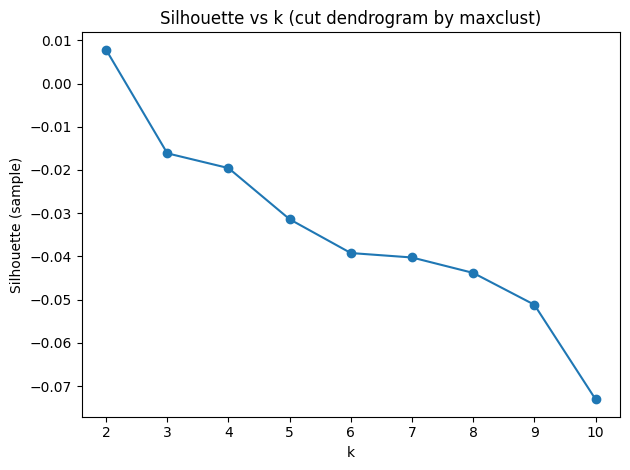

In [ ]:
Z = complete_clustering 
X_hier = X 
n = len(X_hier)
idx = np.random.default_rng(42).choice(n, size=min(2000, n), replace=False)
X_s = X_hier[idx]
k_grid = range(2, 11)
sil_scores = [silhouette_score(X_s, fcluster(Z, t=k, criterion="maxclust")[idx]) for k in k_grid]
best_k = list(k_grid)[int(np.nanargmax(sil_scores))]

print(f"best_k={best_k}, silhouette={np.nanmax(sil_scores):.4f}")
plt.plot(list(k_grid), sil_scores, marker="o")
plt.xlabel("k"); plt.ylabel("Silhouette (sample)")
plt.title("Silhouette vs k (cut dendrogram by maxclust)")
plt.tight_layout(); plt.show()


In [ ]:
# GÁN NHẪN CỤM CHO TOÀN BỘ DỮ LIỆU VỚI best_k ---
labels = fcluster(Z, t=best_k, criterion="maxclust")  # 1..best_k
# ensure labels is 1D and aligns with X_hier index
labels = np.asarray(labels).ravel()
if labels.shape[0] != X_hier.shape[0]:
    # GÁN NHẪN CỤM CHO TOÀN BỘ DỮ LIỆU VỚI best_k ---
    labels = fcluster(Z, t=best_k, criterion="maxclust")  # 1..best_k
    # ensure labels is 1D and aligns with X_hier index
    labels = np.asarray(labels).ravel()
    if labels.shape[0] != X_hier.shape[0]:
        # Try to recover the original X_hier used to compute Z (if vietnam_housing_clean + numeric_cols exist)
        try:
            X_hier_candidate = vietnam_housing_clean[numeric_cols].dropna()
        except Exception:
            X_hier_candidate = None

        if X_hier_candidate is not None and labels.shape[0] == X_hier_candidate.shape[0]:
            # restore X_hier to the dataframe that matches the linkage matrix
            X_hier = X_hier_candidate
        else:
            n_from_Z = (Z.shape[0] + 1) if hasattr(Z, "shape") else None
            raise ValueError(
                f"labels length ({labels.shape[0]}) does not match X_hier rows ({X_hier.shape[0]}). "
                f"Linkage matrix Z corresponds to {n_from_Z} original observations. "
                f"Ensure you are cutting the same linkage matrix Z that was built from X_hier."
            )

    labels_ser = pd.Series(labels, index=X_hier.index, name="hcluster_label")

    # TÓM TẮT CỤM (median theo đơn vị đang có trong X_hier - là thang đã scale) ---
    summary_rows = []
    for c in sorted(np.unique(labels)):
        mask = (labels_ser.values == c)
        row = {"Cluster": int(c), "Count": int(mask.sum())}
        row.update(pd.DataFrame(X_hier.values[mask], columns=numeric_cols).median().to_dict())
        summary_rows.append(row)
    summary_df = pd.DataFrame(summary_rows).sort_values("Cluster").reset_index(drop=True)
    print("\n=== Cluster medians (trên thang đã chuẩn hoá) ===")
    display(summary_df)
labels_ser = pd.Series(labels, index=X_hier.index, name="hcluster_label")



=== Cluster medians (trên thang đã chuẩn hoá) ===


,Cluster,Count,Area,Frontage,Access_Road,Floors,Bedrooms,Bathrooms,Legal_status,Furniture_state,Price,House_direction_sin,House_direction_cos,Balcony_direction_sin,Balcony_direction_cos
0,1,193,-0.357307,-0.511298,-0.183777,5.0,0.855516,1.59219,0.0,1.0,0.748416,0.0,1.0,0.0,1.0
1,2,1788,-0.110938,-0.246976,-0.183777,3.0,-0.369034,-0.21637,0.0,1.0,-0.235342,0.0,1.0,0.0,1.0


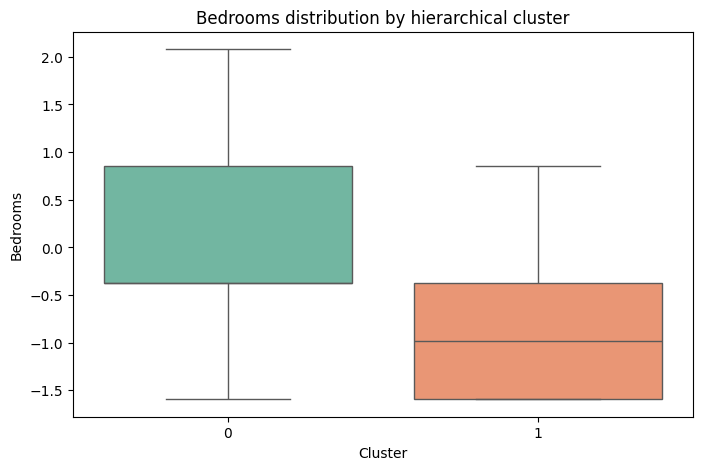

In [ ]:
from scipy.cluster.hierarchy import cut_tree
import seaborn as sns
import matplotlib.pyplot as plt
# Cắt cây dendrogram thành 2 cụm (đổi số nếu muốn)
cluster_labels = cut_tree(average_clustering, n_clusters=2).reshape(-1, )

# Gắn nhãn cụm vào dataframe đang dùng (X_hier hoặc vietnam_housing_scaled)
df_cluster = X_hier.copy()
df_cluster["Cluster"] = cluster_labels

# Chọn biến để xem ý nghĩa (ví dụ 'Price')
target = "Bedrooms"

# Vẽ boxplot để so sánh phân bố biến theo cụm
plt.figure(figsize=(8,5))
sns.boxplot(x="Cluster", y=target, data=df_cluster, palette="Set2")
plt.title(f"{target} distribution by hierarchical cluster")
plt.show()

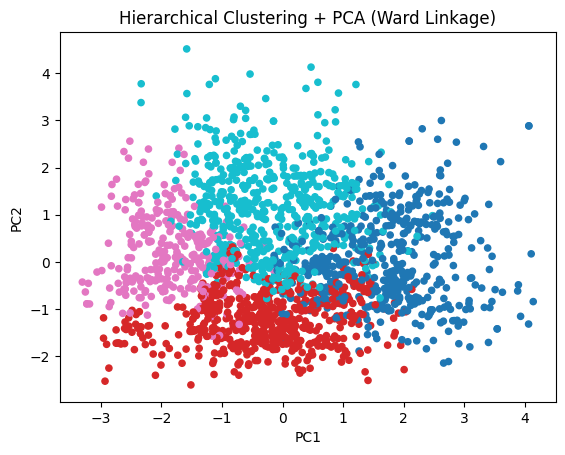

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt

# B1: Chuẩn hóa trực tiếp
num_cols = ['Area','Frontage','Bedrooms','Bathrooms','Price']
X = vietnam_housing_clean[num_cols].dropna().copy() 
X[num_cols] = StandardScaler().fit_transform(X[num_cols])

# B2: Dùng chính X đã scale để phân cụm (không cần X_scaled riêng)
X_scaled = X[num_cols].values

# B3: Hierarchical Clustering với Ward (phù hợp dữ liệu dạng số)
Z = linkage(X_scaled, method='ward')

# B4: Cắt cụm (chọn 4 hoặc 5 cụm)
labels_hier = fcluster(Z, t=4, criterion='maxclust')
X['hcluster'] = labels_hier

# B5: Giảm chiều bằng PCA để xem cụm
pca = PCA(n_components=2).fit_transform(X_scaled)
plt.scatter(pca[:,0], pca[:,1], c=labels_hier, cmap='tab10', s=20)
plt.title("Hierarchical Clustering + PCA (Ward Linkage)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()


In [ ]:
import numpy as np

print("Số cụm thật sự:", len(np.unique(labels)))
print("Phân bố nhãn:", np.unique(labels, return_counts=True))


Số cụm thật sự: 2
Phân bố nhãn: (array([1, 2], dtype=int32), array([ 193, 1788]))


In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score
# 1. Chuẩn hóa
X = vietnam_housing[num_cols].dropna()
X_scaled = StandardScaler().fit_transform(X)
# 2. Linkage
Z = linkage(X_scaled, method='ward')
# 3. Cắt cụm (ví dụ 4 cụm)
labels = fcluster(Z, t=2, criterion='maxclust')
# 4. Silhouette Score
sil_score = silhouette_score(X_scaled, labels)
print("✅ Silhouette Score:", sil_score)


✅ Silhouette Score: 0.20262911245627818


In [ ]:
import joblib
joblib.dump(km, "kmeans_model.joblib")
# load: km = joblib.load("kmeans_model.joblib")

['kmeans_model.joblib']